# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

# Cleaning data

## Read Data 

In [2]:
Education_df = pd.read_csv(r'E:\final project of analysis\HR\Education.csv')

In [3]:
Employee_df = pd.read_csv(r'E:\final project of analysis\HR\Employee.csv')

In [4]:
Performance_df = pd.read_csv(r'E:\final project of analysis\HR\Performance.csv')

In [5]:
Rating_df = pd.read_csv(r'E:\final project of analysis\HR\Rating.csv')

In [6]:
Satisfied_df = pd.read_csv(r'E:\final project of analysis\HR\Satisfied.csv')

### Merge name in employee

In [7]:
Employee_df['full_name'] = Employee_df['FirstName'] + ' ' + Employee_df['LastName']
print(Employee_df)

     EmployeeID   FirstName     LastName      Gender  Age BusinessTravel  \
0     3012-1A41    Leonelle        Simco      Female   30    Some Travel   
1     CBCB-9C9D     Leonerd        Aland        Male   38    Some Travel   
2     95D7-1CE9       Ahmed        Sykes        Male   43    Some Travel   
3     47A0-559B  Ermentrude       Berrie  Non-Binary   39    Some Travel   
4     42CC-040A       Stace       Savege      Female   29    Some Travel   
...         ...         ...          ...         ...  ...            ...   
1465  467E-977A         Jud    Melanaphy        Male   20    Some Travel   
1466  6FB9-A624        Marc       Calver  Non-Binary   27    Some Travel   
1467  EBF4-5928     Rudolph  MacDearmont        Male   21    Some Travel   
1468  60E6-B1D9      Merill          Agg        Male   21    Some Travel   
1469  84D4-D4C3       Naoma      Hebbard      Female   20     No Travel    

           Department  DistanceFromHome (KM) State                  Ethnicity  \
0     

In [8]:
Employee_df.drop(['FirstName','LastName'], axis=1, inplace=True)

In [9]:
Employee_df = Employee_df[['EmployeeID','full_name','Gender','Age','BusinessTravel','Department','DistanceFromHome (KM)','State',
                  'Ethnicity','Education','EducationField','JobRole','MaritalStatus','Salary','StockOptionLevel','OverTime',
                  'HireDate','Attrition','YearsAtCompany','YearsInMostRecentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
Employee_df

,EmployeeID,full_name,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle Simco,Female,30,Some Travel,Sales,27,IL,White,5,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd Aland,Male,38,Some Travel,Sales,23,CA,White,4,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,4,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,3,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace Savege,Female,29,Some Travel,Human Resources,29,CA,White,2,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,2,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,3,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,4,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,3,...,Married,46521,0,No,2022-12-30,No,0,0,0,0


## Rename columns

In [10]:
Education_df = Education_df.rename(columns={'EducationLevelID': 'EducationID', 'EducationLevel': 'EducationLevel'})

In [11]:
Employee_df = Employee_df.rename(columns={'BusinessTravel':'TravelFrequency', 'DistanceFromHome (KM)': 'DistanceFromHome',
                                          'StockOptionsLevel': 'StockOptions','YearsInMostRecentRole': 'RecentRoleYears',
                                          'YearsSinceLastPromotion': 'PromotionGapYears'})

In [12]:
Performance_df=Performance_df.rename(columns={'TrainingOpportunitiesWithinYear':'AnnualTrainingOpportunities',
                                                'TrainingOpportunitiesTaken':'TrainingTaken'})

## Check validation of data

## Data Info

In [13]:
Education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EducationID     5 non-null      int64 
 1   EducationLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [14]:
Employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EmployeeID            1470 non-null   object
 1   full_name             1470 non-null   object
 2   Gender                1470 non-null   object
 3   Age                   1470 non-null   int64 
 4   TravelFrequency       1470 non-null   object
 5   Department            1470 non-null   object
 6   DistanceFromHome      1470 non-null   int64 
 7   State                 1470 non-null   object
 8   Ethnicity             1470 non-null   object
 9   Education             1470 non-null   int64 
 10  EducationField        1470 non-null   object
 11  JobRole               1470 non-null   object
 12  MaritalStatus         1470 non-null   object
 13  Salary                1470 non-null   int64 
 14  StockOptionLevel      1470 non-null   int64 
 15  OverTime              1470 non-null   

In [15]:
Performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   PerformanceID                6709 non-null   object
 1   EmployeeID                   6709 non-null   object
 2   ReviewDate                   6709 non-null   object
 3   EnvironmentSatisfaction      6709 non-null   int64 
 4   JobSatisfaction              6709 non-null   int64 
 5   RelationshipSatisfaction     6709 non-null   int64 
 6   AnnualTrainingOpportunities  6709 non-null   int64 
 7   TrainingTaken                6709 non-null   int64 
 8   WorkLifeBalance              6709 non-null   int64 
 9   SelfRating                   6709 non-null   int64 
 10  ManagerRating                6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [16]:
Rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RatingID     5 non-null      int64 
 1   RatingLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [17]:
Satisfied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SatisfactionID     5 non-null      int64 
 1   SatisfactionLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


### check zero value in columns of Employee

In [18]:
def check_zero_values_in_numeric_columns(Employee_df):
    numeric_df = Employee_df.select_dtypes(include=[int, float])
    
    zero_values = (numeric_df == 0).sum()
    
    zero_columns = zero_values[zero_values > 0]
    
    if not zero_columns.empty:
        print("Columns with zero values:")
        print(zero_columns)
    else:
        print("No zero values found in the numeric columns.")

check_zero_values_in_numeric_columns(Employee_df)


Columns with zero values:
StockOptionLevel        631
YearsAtCompany          190
RecentRoleYears         499
PromotionGapYears       301
YearsWithCurrManager    479
dtype: int64


### check negative value in columns of Employee

In [19]:
def find_employees_with_negative_in_numeric_columns(Employee_df):
    numeric_df = Employee_df.select_dtypes(include=[int, float])
    
    negative_columns = (numeric_df < 0).any()
    negative_columns = negative_columns[negative_columns].index  
    negative_employees = Employee_df[numeric_df[negative_columns].lt(0).any(axis=1)]
    
    if not negative_employees.empty:
        print("Employees with negative values in numeric columns:")
        print(negative_employees[[id_column, name_column] + list(negative_columns)])
    else:
        print("No employees found with negative values in numeric columns.")

find_employees_with_negative_in_numeric_columns(Employee_df)

No employees found with negative values in numeric columns.


### check zero value in columns of Performance

In [20]:
def check_zero_values_in_numeric_columnsP(Performance_df):
    numeric_df = Performance_df.select_dtypes(include=[int, float])
    
    zero_values = (numeric_df == 0).sum()
    
    zero_columns = zero_values[zero_values > 0]
    
    if not zero_columns.empty:
        print("Columns with zero values:")
        print(zero_columns)
    else:
        print("No zero values found in the numeric columns.")

check_zero_values_in_numeric_columnsP(Performance_df)

Columns with zero values:
TrainingTaken    2372
dtype: int64


### check negative value in columns of performance

In [21]:
def find_Performance_with_negative_in_numeric_columns(Performance_df):
    numeric_df = Performance_df.select_dtypes(include=[int, float])
    
    negative_columns = (numeric_df < 0).any()
    negative_columns = negative_columns[negative_columns].index  
    negative_Performance = Performance_df[numeric_df[negative_columns].lt(0).any(axis=1)]
    
    if not negative_Performance.empty:
        print("Performance with negative values in numeric columns:")
        print(negative_Performance[[id_column, name_column] + list(negative_columns)])
    else:
        print("No Performance found with negative values in numeric columns.")

find_Performance_with_negative_in_numeric_columns(Performance_df)

No Performance found with negative values in numeric columns.


### check the validity of foreign keys

In [22]:
columns_to_check = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction','WorkLifeBalance',
                    'SelfRating','ManagerRating']
valid_values = Performance_df[columns_to_check].apply(lambda col: col.between(1, 5))

all_columns_valid = valid_values.all().all()

print("Do all value is the define column from 1 to 5 ?\n", all_columns_valid)

Do all value is the define column from 1 to 5 ?
 True


## check  the duplicate

In [23]:
if Employee_df['EmployeeID'].is_unique:
    print("All values in column 'EmployeeID' are unique.")
else:
    print("Column 'EmployeeID' contains duplicate values.")

All values in column 'EmployeeID' are unique.


In [24]:
if Performance_df['PerformanceID'].is_unique:
    print("All values in column 'PerformanceID' are unique.")
else:
    print("Column 'PerformanceID' contains duplicate values.")

All values in column 'PerformanceID' are unique.


## Merge the table of Employee with the table of Education

In [25]:
Employees_df = pd.merge(Employee_df, Education_df, left_on='Education', right_on='EducationID', how='inner')

In [26]:
Employees_df = Employees_df.drop(['Education', 'EducationID'], axis=1)

In [27]:
Employees_df = Employees_df[['EmployeeID','full_name','Gender','Age','TravelFrequency','Department','DistanceFromHome','State',
                  'Ethnicity','EducationLevel','EducationField','JobRole','MaritalStatus','Salary','StockOptionLevel','OverTime',
                  'HireDate','Attrition','YearsAtCompany','RecentRoleYears','PromotionGapYears','YearsWithCurrManager']]

In [28]:
Employees_df=pd.read_csv(r'E:\final project of analysis\HR_modify\Employees.csv')

## Delete illogical values in perofrmance

In [29]:
# Assuming Employees_df and Performance_df are your DataFrames

# Step 1: Merge the Employees and Performance DataFrames on EmployeeID
merged_df = pd.merge(Performance_df, Employees_df[['EmployeeID', 'Attrition', 'HireDate', 'AttritionYear']], on='EmployeeID')

# Step 2: Convert HireDate and ReviewDate to datetime if they aren't already
merged_df['HireDate'] = pd.to_datetime(merged_df['HireDate'])
merged_df['ReviewDate'] = pd.to_datetime(merged_df['ReviewDate'])

# Step 3: Create a mask for employees who have left the company (Attrition = 'Yes')
mask_left = (
    (merged_df['Attrition'] == 'Yes') &
    ((merged_df['ReviewDate'].dt.year < merged_df['HireDate'].dt.year) |
     (merged_df['ReviewDate'].dt.year > merged_df['AttritionYear'].fillna(0).astype(int)))
)

# Step 4: Create a mask for employees who have not left the company (Attrition = 'No')
mask_not_left = (
    (merged_df['Attrition'] == 'No') &
    (merged_df['ReviewDate'].dt.year < merged_df['HireDate'].dt.year)
)

# Step 5: Combine both conditions using an OR operator
mask_to_remove = mask_left | mask_not_left

# Step 6: Filter out rows where the condition is met (i.e., remove these rows from Performance_df)
performance_filtered = Performance_df[~Performance_df['PerformanceID'].isin(merged_df.loc[mask_to_remove, 'PerformanceID'])]

# Step 7: Optionally, assign back to Performance_df if you want to overwrite the original DataFrame
Performance_df = performance_filtered

# Print the resulting DataFrame
print(Performance_df)

     PerformanceID EmployeeID ReviewDate  EnvironmentSatisfaction  \
0             PR01  79F7-78EC   1/2/2013                        5   
6             PR07  9E7A-1F70   1/8/2013                        3   
9             PR10  774E-685D  1/11/2013                        5   
10           PR100  B013-7D0C  4/10/2013                        4   
11          PR1000  528C-3E0D  3/16/2016                        4   
...            ...        ...        ...                      ...   
6702         PR993  56A5-271B  3/13/2016                        4   
6703         PR994  B3FE-D332  3/13/2016                        4   
6705         PR996  7C80-94E0  3/14/2016                        3   
6706         PR997  8233-2483  3/14/2016                        3   
6707         PR998  8A5B-3D6E  3/15/2016                        5   

      JobSatisfaction  RelationshipSatisfaction  AnnualTrainingOpportunities  \
0                   4                         5                            1   
6          

##  Store modified files

In [30]:
#path=(r"E:\final project of analysis\HR _modify")
#Employees_df.to_excel(path + 'Employees.xlsx', index=False)
#Education_df.to_excel(path + 'Education.xlsx', index=False)
#Performance_df.to_excel(path + 'Performance.xlsx', index=False)
#Rating_df.to_excel(path + 'Rating.xlsx', index=False)
#Satisfied_df.to_excel(path + 'Satisfied.xlsx', index=False)

# Analysis Data

## Questions about the employee turnover rate

## Q1: Show if salary has Outliers

Mean: 112956.49795918367
Median: 71199.5
Mode: 26973
IQR: 98475.25
Lower Bound: -104132.375, Upper Bound: 289768.625
Number of outliers: 124


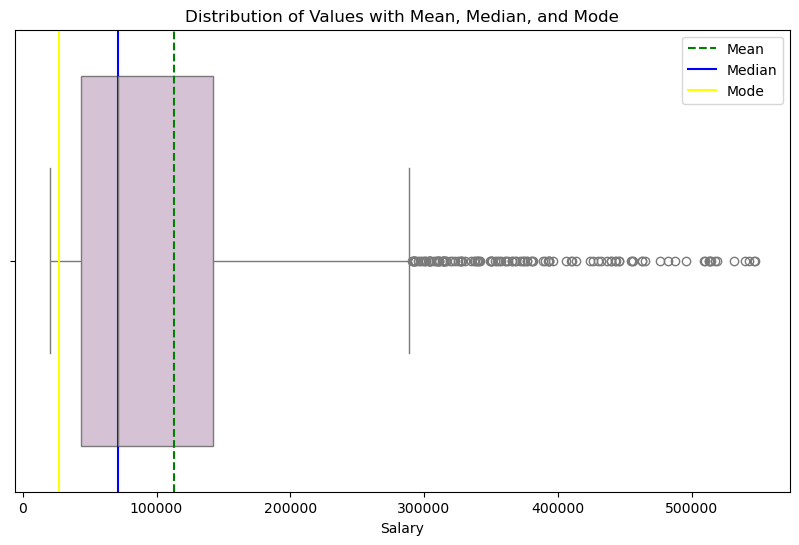

In [31]:
mean_value = Employees_df['Salary'].mean()
median_value = Employees_df['Salary'].median()
mode_value = Employees_df['Salary'].mode()[0]

Q1 = Employees_df['Salary'].quantile(0.25)
Q3 = Employees_df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = Employees_df[(Employees_df['Salary'] < lower_bound) | (Employees_df['Salary'] > upper_bound)]
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of outliers: {len(outliers)}")
plt.figure(figsize=(10, 6))

sns.boxplot(x=Employees_df['Salary'], color='#D8BFD8')

plt.axvline(mean_value, color='green', linestyle='--', label='Mean')
plt.axvline(median_value, color='blue', linestyle='-', label='Median')
plt.axvline(mode_value, color='Yellow', linestyle='-', label='Mode')

plt.title("Distribution of Values with Mean, Median, and Mode")
plt.legend()
plt.show()

## ______________________________________________________________________________________________________

### Q2: Avg Salary by job Role in each year

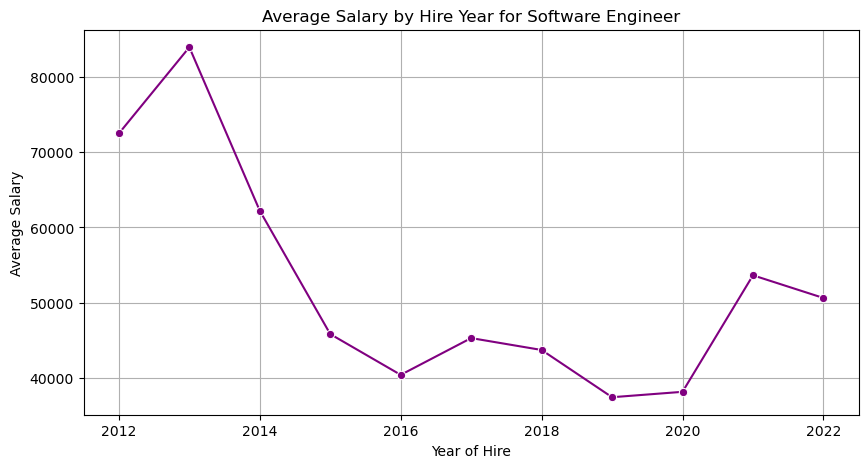

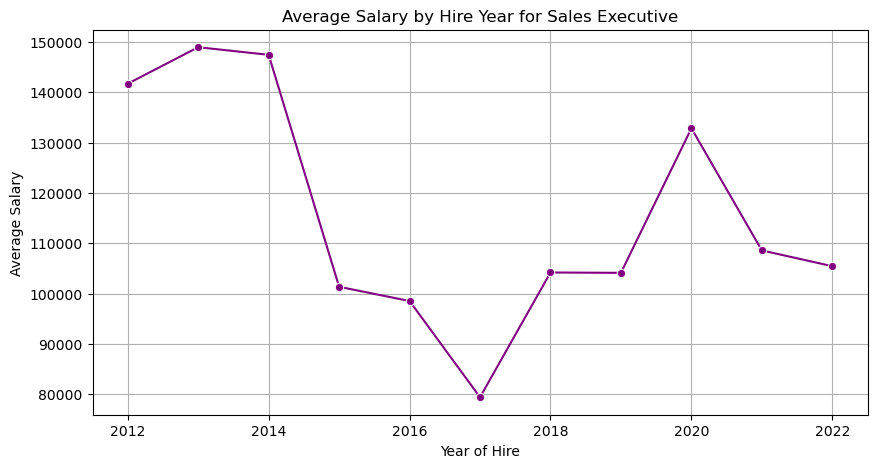

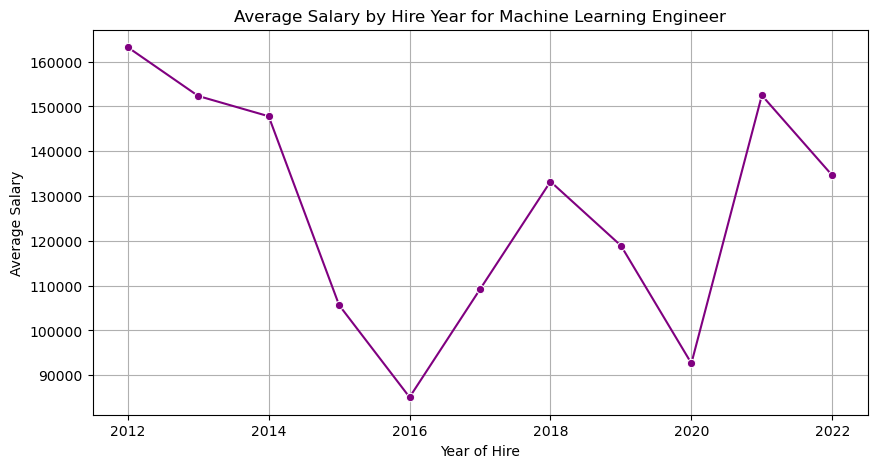

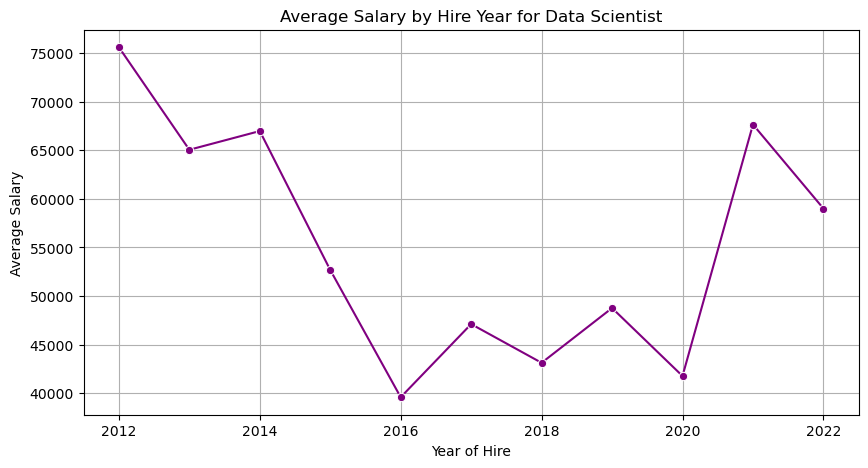

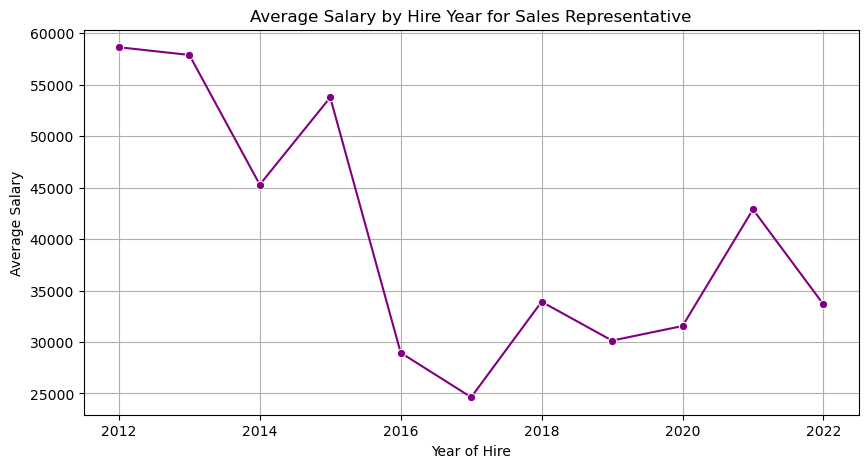

In [ ]:
if 'JobRole' in Employees_df.columns and 'HireDate' in Employees_df.columns and 'Salary' in Employees_df.columns:
    # Extract the hire year from the HireDate column
    Employees_df['HireYear'] = pd.to_datetime(Employees_df['HireDate']).dt.year

    # Get unique job roles
    job_roles = Employees_df['JobRole'].unique()

    # Create a plot for each job role
    for job_role in job_roles:
        # Filter data for each Job Role
        job_role_data = Employees_df[Employees_df['JobRole'] == job_role]

        # Calculate average salary by hire year
        avg_salary_by_hireyear = job_role_data.groupby('HireYear')['Salary'].mean().reset_index()

        # Set up the plotJJ
        plt.figure(figsize=(10, 5))

        # Create a line plot for average salary with purple color
        sns.lineplot(x='HireYear', y='Salary', data=avg_salary_by_hireyear, marker='o', color='purple')

        # Add titles and labels with purple color
        plt.title(f'Average Salary by Hire Year for {job_role}', color='Black')
        plt.xlabel('Year of Hire', color='Black')
        plt.ylabel('Average Salary', color='Black')

        # Improve the plot appearance
        plt.grid(True)

        # Show the plot
        plt.show()
else:
    print("One or more required columns ('JobRole', 'HireDate', 'Salary') are missing in the dataset.") 

### Q3: The Rate of Attration and Hirring

In [ ]:
Employees_df['HireYear'] = pd.to_datetime(Employees_df['HireDate']).dt.year
attrition_by_role_year = Employees_df[Employees_df['Attrition'] == 'Yes'].groupby(['JobRole', 'AttritionYear']).size().unstack(fill_value=0)

hiring_by_role_year = Employees_df.groupby(['JobRole', 'HireYear']).size().unstack(fill_value=0)

job_roles = Employees_df['JobRole'].unique()

for job_role in job_roles:
    plt.figure(figsize=(10, 5))
    
    if job_role in attrition_by_role_year.index:
        plt.plot(attrition_by_role_year.columns, attrition_by_role_year.loc[job_role], label='Attrition Rate', color='gray', marker='o')
    
    if job_role in hiring_by_role_year.index:
        plt.plot(hiring_by_role_year.columns, hiring_by_role_year.loc[job_role], label='Hiring Rate', color='purple', marker='o')

    plt.title(f'Attrition and Hiring Rate for {job_role}')
    plt.xlabel('Year')
    plt.ylabel('Number of Employees')
    plt.legend()

    plt.grid(True)
    plt.show()


### Q4: Number of Employees in Each State

In [ ]:
# Assuming Employees_df is already loaded

# Count the number of employees in each state
state_counts = Employees_df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'EmployeeCount']

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot with purple color palette
plt.figure(figsize=(12, 6))
sns.barplot(data=state_counts, x='State', y='EmployeeCount', hue='State', palette='Purples_r')

# Add title and labels
plt.title('Number of Employees in Each State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Display the plot
plt.show()

### Q4:Attration Rate by State

In [ ]:
# Assuming Employees_df is already loaded
# Employees_df = pd.read_excel('path_to_your_file/modify.xlsx', sheet_name='Employees')

# Calculate total employees and employees with attrition = 'Yes' per state
state_counts = Employees_df.groupby('State').size().reset_index(name='TotalEmployees')

attrition_counts = (
    Employees_df[Employees_df['Attrition'] == 'Yes']
    .groupby('State')
    .size()
    .reset_index(name='AttritionCount')
)

# Merge the two DataFrames to calculate attrition rate
merged_data = pd.merge(state_counts, attrition_counts, on='State', how='left')

# Handle states with no attrition
merged_data['AttritionCount'] = merged_data['AttritionCount'].fillna(0)

# Calculate the attrition rate
merged_data['AttritionRate'] = (merged_data['AttritionCount'] / merged_data['TotalEmployees']) * 100

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for attrition rate
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='State', y='AttritionRate', hue='State', palette='Purples_r')

# Add title and labels
plt.title('Attrition Rate per State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent label clipping

# Display the plot
plt.show()

# Display the merged data for reference
print(merged_data[['State', 'TotalEmployees', 'AttritionCount', 'AttritionRate']])

### Q5: Rate of Attration in each state in each job role

In [ ]:
# Group and calculate attrition count and total count by 'State' and 'JobRole'
attrition_data = Employee_df[Employee_df['Attrition'] == 'Yes']
attrition_count = attrition_data.groupby(['State', 'JobRole']).size().reset_index(name='AttritionCount')
total_count = Employee_df.groupby(['State', 'JobRole']).size().reset_index(name='TotalCount')

# Merge to calculate attrition rate
merged_df = pd.merge(total_count, attrition_count, on=['State', 'JobRole'], how='left')
merged_df['AttritionCount'] = merged_df['AttritionCount'].fillna(0)  # Handle NaN values
merged_df['AttritionRate'] = (merged_df['AttritionCount'] / merged_df['TotalCount']) * 100

# Plotting using Seaborn with shades of purple
plt.figure(figsize=(15, 8))
sns.set_palette("Purples")  # Set color palette to purple shades

# Create a bar plot with Seaborn
sns.barplot(
    data=merged_df,
    x='JobRole',
    y='AttritionRate',
    hue='State'
)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by State and Job Role')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()

# Display the plot
plt.show()

### Q6: Attrition Rate by Travel frequancy

In [ ]:
# Assuming Employees_df is already loaded
# Employees_df = pd.read_excel('path_to_your_file/modify.xlsx', sheet_name='Employees')

# Calculate total employees and employees with attrition = 'Yes' for each travel frequency
travel_counts = Employees_df.groupby('TravelFrequency').size().reset_index(name='TotalEmployees')

attrition_travel_counts = (
    Employees_df[Employees_df['Attrition'] == 'Yes']
    .groupby('TravelFrequency')
    .size()
    .reset_index(name='AttritionCount')
)

# Merge the two DataFrames to calculate attrition rate
merged_data = pd.merge(travel_counts, attrition_travel_counts, on='TravelFrequency', how='left')

# Handle travel frequencies with no attrition
merged_data['AttritionCount'] = merged_data['AttritionCount'].fillna(0)

# Calculate the attrition rate
merged_data['AttritionRate'] = (merged_data['AttritionCount'] / merged_data['TotalEmployees']) * 100

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for attrition rate by travel frequency
plt.figure(figsize=(8, 6))
sns.barplot(data=merged_data, x='TravelFrequency', y='AttritionRate',hue='TravelFrequency', palette='Purples')

# Add title and labels
plt.title('Attrition Rate by Travel Frequency', fontsize=14)
plt.xlabel('Travel Frequency', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)

# Display the plot
plt.show()

# Display the merged data for reference
print(merged_data[['TravelFrequency', 'TotalEmployees', 'AttritionCount', 'AttritionRate']])

### Q7: Attrition Rate by Job Role and Travel Frequency

In [ ]:
# Assuming Employees_df contains 'JobRole', 'TravelFrequency', and 'Attrition'

# Step 1: Count total employees by JobRole and TravelFrequency
total_by_travel_role = Employees_df.groupby(['JobRole', 'TravelFrequency']).size().reset_index(name='Total')

# Step 2: Count employees who left the company (Attrition == 'Yes') by JobRole and TravelFrequency
attrition_by_travel_role = Employees_df[Employees_df['Attrition'] == 'Yes'].groupby(['JobRole', 'TravelFrequency']).size().reset_index(name='Left')

# Step 3: Merge the two dataframes to get the total and the left employees in the same table
travel_role_attrition = pd.merge(total_by_travel_role, attrition_by_travel_role, on=['JobRole', 'TravelFrequency'], how='left')

# Step 4: Fill NaN values in the 'Left' column with 0 (no one left in that category)
travel_role_attrition['Left'] = travel_role_attrition['Left'].fillna(0)

# Step 5: Calculate the Attrition Rate for each combination of JobRole and TravelFrequency
travel_role_attrition['AttritionRate'] = (travel_role_attrition['Left'] / travel_role_attrition['Total']) * 100

# Step 6: Plot the data using a grouped barplot
plt.figure(figsize=(14, 8))

# Grouped bar plot showing attrition rate by JobRole and TravelFrequency
sns.barplot(x='JobRole', y='AttritionRate', hue='TravelFrequency', data=travel_role_attrition, palette='Purples')

# Add labels and title
plt.title('Attrition Rate by Job Role and Travel Frequency', color='purple')
plt.xlabel('Job Role', color='purple')
plt.ylabel('Attrition Rate (%)', color='purple')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Q8: The year at company & Attration 

In [ ]:
if 'Attrition' in Employees_df.columns and 'YearsAtCompany' in Employees_df.columns and 'Department' in Employees_df.columns:
    # تصفية الموظفين الذين تركوا الشركة فقط
    attrition_data = Employees_df[Employees_df['Attrition'] == 'Yes']
    
    # إعداد الرسم البياني
    plt.figure(figsize=(12, 8))

    # تحديد درجات اللون البنفسجي
    purple_palette = ['#EAB8EA','#B87CC8', '#5B3B8A']

    # رسم بياني شريطي يوضح عدد الموظفين الذين تركوا الشركة حسب عدد السنين في الشركة لكل قسم
    sns.countplot(x='YearsAtCompany', hue='Department', data=attrition_data, palette=purple_palette)

    # إضافة العناوين والتسميات
    plt.title('Employee Attrition vs Years at Company by Department')
    plt.xlabel('Years at Company')
    plt.ylabel('Number of Employees who Left')
    plt.legend(title='Department')

    # تحسين الشكل
    plt.grid(True)

    # عرض الرسم البياني
    plt.show()
else:
    print("Column 'Attrition', 'YearsAtCompany', or 'Department' is missing in the dataset.")

### Q9: Atration_stock_option_level

In [ ]:
# Assuming Employees_df is already loaded
# Employees_df = pd.read_excel('path_to_your_file/modify.xlsx', sheet_name='Employees')

# Group by 'YearsAtCompany' and 'StockOptionLevel'
total_counts = Employees_df.groupby(['YearsAtCompany', 'StockOptionLevel']).size().reset_index(name='TotalEmployees')

attrition_counts = (
    Employees_df[Employees_df['Attrition'] == 'Yes']
    .groupby(['YearsAtCompany', 'StockOptionLevel'])
    .size()
    .reset_index(name='AttritionCount')
)

# Merge total counts and attrition counts
merged_data = pd.merge(total_counts, attrition_counts, on=['YearsAtCompany', 'StockOptionLevel'], how='left')
merged_data['AttritionCount'] = merged_data['AttritionCount'].fillna(0)
merged_data['AttritionRate'] = (merged_data['AttritionCount'] / merged_data['TotalEmployees']) * 100

# Set plot style
sns.set(style="whitegrid")

# Use a palette with exactly the number of unique StockOptionLevels
num_levels = merged_data['StockOptionLevel'].nunique()
custom_palette = sns.color_palette("magma", n_colors=num_levels)

# Plot the data
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=merged_data,
    x='YearsAtCompany',
    y='AttritionRate',
    hue='StockOptionLevel',
    palette=custom_palette
)

# Add plot labels and title
plt.title('Attrition Rate by Years at Company and Stock Option Level', fontsize=16)
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Stock Option Level', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Print merged data for reference
print(merged_data[['YearsAtCompany', 'StockOptionLevel', 'TotalEmployees', 'AttritionCount', 'AttritionRate']])


### Q10: Employee Attrition Rate by Job Role and Years with Current Manager

In [ ]:
# Ensure the required columns are present in the dataset
if 'JobRole' in Employees_df.columns and 'Attrition' in Employees_df.columns and 'YearsWithCurrManager' in Employees_df.columns:

    # Step 1: Calculate the total number of employees per job role and years with current manager
    total_by_jobrole_manager = Employees_df.groupby(['JobRole', 'YearsWithCurrManager']).size().reset_index(name='Total')

    # Step 2: Calculate the number of employees who left the company (Attrition == 'Yes')
    attrition_by_jobrole_manager = Employees_df[Employees_df['Attrition'] == 'Yes'].groupby(['JobRole', 'YearsWithCurrManager']).size().reset_index(name='Left')

    # Step 3: Merge the data to get the total and those who left
    job_role_manager_attrition = pd.merge(total_by_jobrole_manager, attrition_by_jobrole_manager, on=['JobRole', 'YearsWithCurrManager'], how='left')

    # Step 4: Fill NaN values in 'Left' with 0 where no employees left
    job_role_manager_attrition['Left'] = job_role_manager_attrition['Left'].fillna(0)

    # Step 5: Calculate the attrition rate as a percentage
    job_role_manager_attrition['AttritionRate'] = (job_role_manager_attrition['Left'] / job_role_manager_attrition['Total']) * 100

    # Step 6: Plot the data
    plt.figure(figsize=(14, 7))

    # Create a barplot showing the attrition rate, colored by years with the current manager
    sns.barplot(x='JobRole', y='AttritionRate', hue='YearsWithCurrManager', data=job_role_manager_attrition, palette='Purples_r')

    # Add titles and labels
    plt.title('Employee Attrition Rate by Job Role and Years with Current Manager', color='purple')
    plt.xlabel('Job Role', color='purple')
    plt.ylabel('Attrition Rate (%)', color='purple')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

else:
    print("Ensure that your dataset contains the following columns: 'JobRole', 'Attrition', 'YearsWithCurrManager'.")

###  Q11:Manager Rating and turnover

In [ ]:
performance_Rating = Performance_df.merge(
    Rating_df[['RatingID', 'RatingLevel']],
    left_on='ManagerRating',
    right_on='RatingID',
    how='left'
)

# Step 2: Calculate the average WorkLifeBalance (Rating) for each employee and round to the nearest integer
avg_Rating = performance_Rating.groupby('EmployeeID')['ManagerRating'].mean().reset_index()
avg_Rating['RoundedRating'] = avg_Rating['ManagerRating'].round().astype(int)

# Step 3: Merge with Employees_df to get attrition information
employee_attrition = Employees_df[['EmployeeID', 'Attrition']].merge(avg_Rating, on='EmployeeID', how='left')

# Step 4: Calculate attrition counts based on rounded rating levels
attrition_counts = employee_attrition.groupby('RoundedRating')['Attrition'].value_counts().unstack(fill_value=0)

# Ensure correct column names for attrition status
attrition_counts.columns = ['No', 'Yes']  # Assuming "No" = Stayed and "Yes" = Left

# Step 5: Calculate attrition rates
attrition_rates = attrition_counts.div(attrition_counts.sum(axis=1), axis=0)
attrition_rates['AttritionRate'] = attrition_rates['Yes'] / (attrition_rates['Yes'] + attrition_rates['No']) * 100  # Convert to percentage

# Step 6: Merge with Rating_levels (assuming RoundedRating corresponds to RatingID)
Rating_levels = Rating_df.set_index('RatingID')['RatingLevel']
Rating_counts = attrition_rates.join(Rating_levels, on='RoundedRating', how='left')

# Step 7: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Rating_counts.reset_index(), 
    x='RoundedRating', 
    y='AttritionRate', 
    hue='RatingLevel', 
    palette='Purples_r', 
    legend=False
)
plt.title('Attrition Rate Based on Manager Rating')
plt.xlabel('Rounded Manager Rating')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Q12:Relationship Satisfaction and tunover

In [ ]:
# Step 1: Merge Performance_df with Satisfied_df to get SatisfactionLevel
performance_satisfaction = Performance_df.merge(
    Satisfied_df[['SatisfactionID', 'SatisfactionLevel']],
    left_on='RelationshipSatisfaction',
    right_on='SatisfactionID',
    how='left'
)

# Step 2: Calculate the average Relationship Satisfaction for each employee and round to the nearest integer
avg_satisfaction = performance_satisfaction.groupby('EmployeeID')['RelationshipSatisfaction'].mean().reset_index()
avg_satisfaction['RoundedSatisfaction'] = avg_satisfaction['RelationshipSatisfaction'].round().astype(int)

# Step 3: Merge with Employees_df to get attrition information
employee_attrition = Employees_df[['EmployeeID', 'Attrition']].merge(avg_satisfaction, on='EmployeeID', how='left')

# Step 4: Calculate attrition counts based on satisfaction levels
attrition_counts = employee_attrition.groupby('RoundedSatisfaction')['Attrition'].value_counts().unstack(fill_value=0)

# Ensure correct column names
attrition_counts.columns = ['No', 'Yes']  # Assuming "No" = Stayed and "Yes" = Left

# Step 5: Calculate attrition rates
attrition_rates = attrition_counts.div(attrition_counts.sum(axis=1), axis=0)
attrition_rates['AttritionRate'] = attrition_rates['Yes'] / (attrition_rates['Yes'] + attrition_rates['No'])

# Step 6: Create a DataFrame for plotting with SatisfactionLevel
satisfaction_levels = Satisfied_df.set_index('SatisfactionID')['SatisfactionLevel']
satisfaction_counts = attrition_rates.join(satisfaction_levels, on='RoundedSatisfaction', how='left')

# Step 7: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=satisfaction_counts.reset_index(), x='RoundedSatisfaction', y='AttritionRate', hue='SatisfactionLevel', palette='Purples_r', legend=False)
plt.title('Attrition Rate Based on Relationship Satisfaction Level')
plt.xlabel('Rounded Relationship Satisfaction Level')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()

### Q13: Life Balance and tunover

In [ ]:
performance_Rating = Performance_df.merge(
    Rating_df[['RatingID', 'RatingLevel']],
    left_on='WorkLifeBalance',
    right_on='RatingID',
    how='left'
)

# Step 2: Calculate the average WorkLifeBalance (Rating) for each employee and round to the nearest integer
avg_Rating = performance_Rating.groupby('EmployeeID')['WorkLifeBalance'].mean().reset_index()
avg_Rating['RoundedRating'] = avg_Rating['WorkLifeBalance'].round().astype(int)

# Step 3: Merge with Employees_df to get attrition information
employee_attrition = Employees_df[['EmployeeID', 'Attrition']].merge(avg_Rating, on='EmployeeID', how='left')

# Step 4: Calculate attrition counts based on rounded rating levels
attrition_counts = employee_attrition.groupby('RoundedRating')['Attrition'].value_counts().unstack(fill_value=0)

# Ensure correct column names for attrition status
attrition_counts.columns = ['No', 'Yes']  # Assuming "No" = Stayed and "Yes" = Left

# Step 5: Calculate attrition rates
attrition_rates = attrition_counts.div(attrition_counts.sum(axis=1), axis=0)
attrition_rates['AttritionRate'] = attrition_rates['Yes'] / (attrition_rates['Yes'] + attrition_rates['No']) * 100  # Convert to percentage

# Step 6: Merge with Rating_levels (assuming RoundedRating corresponds to RatingID)
Rating_levels = Rating_df.set_index('RatingID')['RatingLevel']
Rating_counts = attrition_rates.join(Rating_levels, on='RoundedRating', how='left')

# Step 7: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Rating_counts.reset_index(), 
    x='RoundedRating', 
    y='AttritionRate', 
    hue='RatingLevel', 
    palette='Purples_r', 
    legend=False
)
plt.title('Attrition Rate Based on Work Life Balance')
plt.xlabel('Rounded Work Life Balance')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Q14 Attration Rate by Over time

In [ ]:
# Group data by OverTime to calculate total employees and those with attrition
total_counts = Employees_df.groupby('OverTime').size().reset_index(name='TotalEmployees')

attrition_counts = (
    Employees_df[Employees_df['Attrition'] == 'Yes']
    .groupby('OverTime')
    .size()
    .reset_index(name='AttritionCount')
)

# Merge total and attrition counts to calculate attrition rate
merged_data = pd.merge(total_counts, attrition_counts, on='OverTime', how='left')
merged_data['AttritionCount'] = merged_data['AttritionCount'].fillna(0)
merged_data['AttritionRate'] = (merged_data['AttritionCount'] / merged_data['TotalEmployees']) * 100

# Set plot style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=merged_data, 
    x='OverTime', 
    y='AttritionRate',
    hue='OverTime',
    palette='Purples'
)

# Add plot labels and title
plt.title('Attrition Rate by Overtime', fontsize=16)
plt.xlabel('OverTime', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Print merged data for reference
print(merged_data[['OverTime', 'TotalEmployees', 'AttritionCount', 'AttritionRate']])


### Q15:Relation Between Frequency travel,Overtime and attration rate

In [ ]:

# Group data by TravelFrequency and OverTime to calculate total employees and those with attrition
total_counts = Employees_df.groupby(['TravelFrequency', 'OverTime']).size().reset_index(name='TotalEmployees')

attrition_counts = (
    Employees_df[Employees_df['Attrition'] == 'Yes']
    .groupby(['TravelFrequency', 'OverTime'])
    .size()
    .reset_index(name='AttritionCount')
)

# Merge total and attrition counts to calculate attrition rate
merged_data = pd.merge(total_counts, attrition_counts, on=['TravelFrequency', 'OverTime'], how='left')
merged_data['AttritionCount'] = merged_data['AttritionCount'].fillna(0)
merged_data['AttritionRate'] = (merged_data['AttritionCount'] / merged_data['TotalEmployees']) * 100

# Set plot style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=merged_data, 
    x='TravelFrequency', 
    y='AttritionRate', 
    hue='OverTime', 
    palette='Purples'
)

# Add plot labels and title
plt.title('Attrition Rate by Travel Frequency and Overtime', fontsize=16)
plt.xlabel('Travel Frequency', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='OverTime', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Print merged data for reference
print(merged_data[['TravelFrequency', 'OverTime', 'TotalEmployees', 'AttritionCount', 'AttritionRate']])


## Q16: Attration_Education_Salary

In [ ]:
# Convert HireDate to datetime if not already
Employees_df['HireDate'] = pd.to_datetime(Employees_df['HireDate'])

# Extract the year from HireDate and create a new column
Employees_df['HireYear'] = Employees_df['HireDate'].dt.year

# Check if the required columns exist
if 'Salary' in Employees_df.columns and 'EducationLevel' in Employees_df.columns and 'Attrition' in Employees_df.columns:
    # Calculate average salary by education level, attrition status, and hire year
    avg_salary = Employees_df.groupby(['HireYear', 'EducationLevel', 'Attrition'])['Salary'].mean().reset_index()

    # Get unique years to create separate plots
    unique_years = avg_salary['HireYear'].unique()

    # Define a custom palette for gray and purple
    custom_palette = ['gray', 'purple']  # First color for 'Attrition=Yes', second for 'Attrition=No'

    for year in unique_years:
        # Filter data for the current year
        year_data = avg_salary[avg_salary['HireYear'] == year]

        # Set up the plot
        plt.figure(figsize=(10, 5))

        # Create a bar plot without confidence intervals, using the custom palette
        sns.barplot(data=year_data, x='EducationLevel', y='Salary', hue='Attrition',color='purple',palette=custom_palette, errorbar=None)

        # Add titles and labels
        plt.title(f'Average Salary by Education Level and Attrition Status for {year}')
        plt.xlabel('Education Level', color='purple')
        plt.ylabel('Average Salary', color='purple')

        # Improve the plot appearance
        plt.xticks(rotation=45)
        plt.legend(title='Attrition Status')
        plt.grid(axis='y')

        # Show the plot
        plt.tight_layout()
        plt.show()
else:
    print("One or more required columns ('Salary', 'EducationLevel', 'Attrition') are missing in the dataset.")

### Q16: Attration by Education Level

In [ ]:
total_employees_by_education = Employees_df.groupby('EducationLevel')['Attrition'].count().reset_index(name='TotalEmployees')

# Calculate the number of employees who left the company for each education level
attrition_counts = Employees_df[Employees_df['Attrition'] == 'Yes'].groupby('EducationLevel')['Attrition'].count().reset_index(name='AttritionCount')

# Merge the total employees and attrition counts into one dataframe
attrition_percentage_df = pd.merge(total_employees_by_education, attrition_counts, on='EducationLevel')

# Calculate the percentage of employees who left
attrition_percentage_df['AttritionPercentage'] = (attrition_percentage_df['AttritionCount'] / attrition_percentage_df['TotalEmployees']) * 100

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to show attrition percentages by education level
sns.barplot(x='EducationLevel', y='AttritionPercentage', hue='EducationLevel', data=attrition_percentage_df, palette='Purples_r', legend=False)
# Add titles and labels
plt.title('Percentage of Employees Who Left the Company by Education Level', color='purple')
plt.xlabel('Education Level', color='purple')
plt.ylabel('Attrition Percentage (%)', color='purple')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### The Expectations 

In [ ]:
# 1. Load the dataset (Replace 'your_dataframe' with your DataFrame variable)
df = Employees_df

# 2. Preprocessing
# Encode categorical variables: OverTime, TravelFrequency, and EducationLevel
encoder = LabelEncoder()
df['OverTime'] = encoder.fit_transform(df['OverTime'])
df['TravelFrequency'] = encoder.fit_transform(df['TravelFrequency'])
df['EducationLevel'] = encoder.fit_transform(df['EducationLevel'])

# Select features and target variable
features = ['OverTime', 'Age', 'StockOptionLevel', 'TravelFrequency', 'EducationLevel', 'Salary']
X = df[features]
y = df['Salary']

# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 3. Model Training
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics: MSE, MAE, and R²
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared Score (R²): {r2:.2f}')

# Calculate accuracy as a percentage
accuracy = r2 * 100
print(f'Model Accuracy: {accuracy:.2f}%')

# 5. Salary Prediction for 2023–2027
# Create a dictionary to store predictions for each job role
predictions = {}
years = np.arange(2023, 2028)

for role in df['JobRole'].unique():
    # Filter rows for the current job role and compute the average feature values
    role_df = df[df['JobRole'] == role]
    avg_features = role_df[features].mean().to_frame().T  # Create DataFrame with valid feature names

    # Predict average salary for the next 5 years
    salary_preds = model.predict(avg_features) * np.ones_like(years)

    # Store predictions for the current job role
    predictions[role] = salary_preds

# 6. Visualization of Real and Predicted Salaries
# Plot the data for each job role
for role, salary_preds in predictions.items():
    plt.figure(figsize=(8, 5))

    # Plot real data points (historical salaries)
    sns.lineplot(
        x=df[df['JobRole'] == role]['AttritionYear'],
        y=df[df['JobRole'] == role]['Salary'],
        color='Purple',marker='o', label='Real'
    )

    # Plot predicted salaries for 2023–2027
    sns.lineplot(
        x=years, y=salary_preds,
        color='Gray',marker='o', label='Predicted'
    )

    # Chart settings
    plt.title(f'Average Salary Prediction for {role} (2023-2027)')
    plt.xlabel('Year')
    plt.ylabel('Average Salary')
    plt.legend()
    plt.show()
